How has salaries increased over the years?

In [1]:
import pandas as pd

In [ ]:
df_fulltime = pd.read_csv("241209_archinect_salaries_fulltime.csv")

df_cpi = pd.read_csv("CPIAUCSL.csv")
#convert Date to datetime object
df_cpi["DATE"] = pd.to_datetime(df_cpi["DATE"])

#this information only goes to 2024/10, so for 2024/11 I will use the 2024/10 value
new_row = pd.DataFrame({'DATE': [pd.Timestamp('2024-11-01')], 'CPIAUCSL': [df_cpi[df_cpi['DATE'] == '2024-10-01']['CPIAUCSL'].values[0]]})
df_cpi = pd.concat([df_cpi, new_row], ignore_index=True)

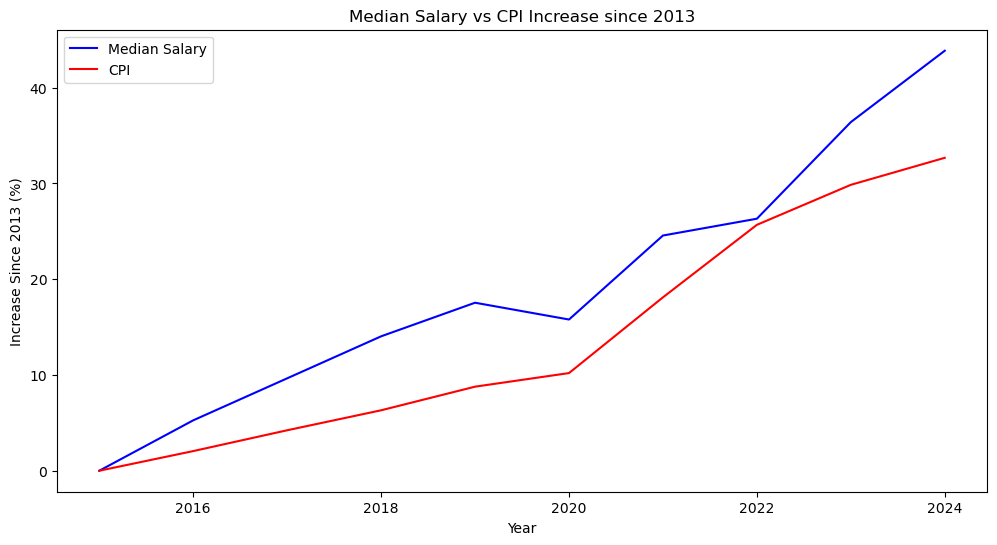

In [5]:
import matplotlib.pyplot as plt
# Calculate the median salary by year
df_fulltime_median_by_year = df_fulltime.groupby('Year')['Salary'].median().reset_index()
df_fulltime_median_by_year = df_fulltime_median_by_year[df_fulltime_median_by_year['Year']>=2015]
#calculate percentage change since 2013
df_fulltime_median_by_year['Salary Growth (%)'] = (df_fulltime_median_by_year['Salary']/ df_fulltime_median_by_year.iloc[0]['Salary'] -1)* 100 

# Limit df_cpi to 2013 to 2024
df_cpi_limited = df_cpi[df_cpi['DATE'] >= '2015-01-01']
df_cpi_by_year = df_cpi_limited.set_index('DATE').resample('Y').last()['CPIAUCSL'].reset_index()
df_cpi_by_year['DATE'] = df_cpi_by_year['DATE'].dt.year
#calculate percentage change since 2013
df_cpi_by_year['CPI Growth (%)'] = (df_cpi_by_year['CPIAUCSL']/ df_cpi_by_year.iloc[0]['CPIAUCSL'] -1)*100

# Plot the median salary by year
plt.figure(figsize=(12, 6))
plt.plot(df_fulltime_median_by_year['Year'], df_fulltime_median_by_year['Salary Growth (%)'], color='blue', label='Median Salary')
plt.plot(df_cpi_by_year['DATE'], df_cpi_by_year['CPI Growth (%)'], color='red', label='CPI')

# # Annotate the values on the graph
# for i, row in df_fulltime_median_by_year.iterrows():
#   plt.annotate(f"{row['Salary Growth (%)']:.1f}%", (row['Year'], row['Salary Growth (%)']), textcoords="offset points", xytext=(0,5), ha='center', color='blue')

# for i, row in df_cpi_by_year.iterrows():
#   plt.annotate(f"{row['CPI Growth (%)']:.1f}%", (row['DATE'], row['CPI Growth (%)']), textcoords="offset points", xytext=(0,5), ha='center', color='red')

plt.title("Median Salary vs CPI Increase since 2013")
plt.xlabel("Year")
plt.ylabel("Increase Since 2013 (%)")
plt.legend()
plt.show()



<h4>Adding Housing Prices</h4>

Shockingly, increase in salary has actually exceeded inflation rates. Then why do people still feel like they have less spending power? Maybe it's from the high housing prices? I added House Price Index for the [US](https://fred.stlouisfed.org/series/USSTHPI), which measures the movement of single-family home prices in the US.

In [6]:
#all-transactions house price index for the US
df_ussthpi = pd.read_csv("USSTHPI.csv")
df_ussthpi["DATE"] = pd.to_datetime(df_ussthpi["DATE"])
df_ussthpi_limited = df_ussthpi[df_ussthpi['DATE'] >= '2015-01-01']
df_ussthpi_by_year = df_ussthpi_limited.set_index('DATE').resample('Y').last()['USSTHPI'].reset_index()

df_ussthpi_by_year['DATE'] = df_ussthpi_by_year['DATE'].dt.year
#calculate percentage change since 2013
df_ussthpi_by_year['USSTHPI Growth (%)'] = (df_ussthpi_by_year['USSTHPI']/ df_ussthpi_by_year.iloc[0]['USSTHPI'] -1)*100

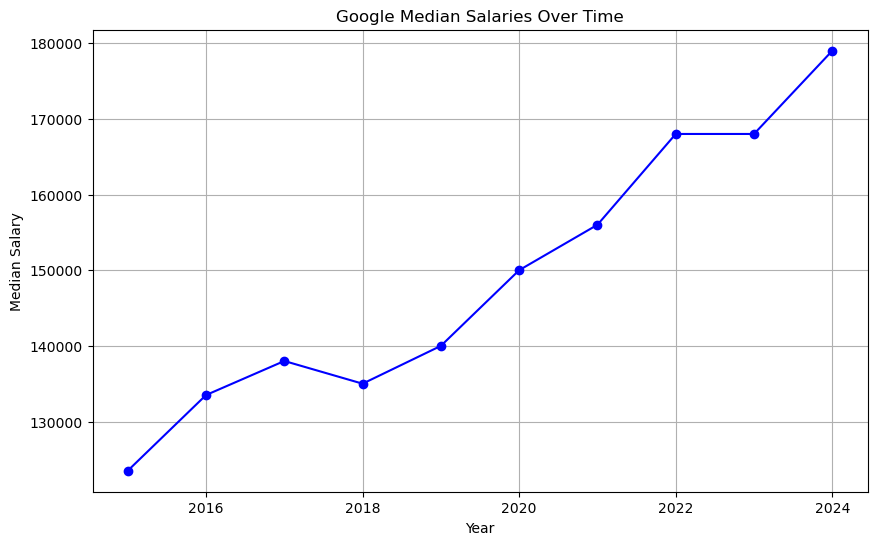

In [12]:
#median salary data from h1bdata.info, for google
google_salaries = [
  {"Date": 2024, "Salary": 179000},
  {"Date": 2023, "Salary": 168000},
  {"Date": 2022, "Salary": 168000},
  {"Date": 2021, "Salary": 156000},
  {"Date": 2020, "Salary": 150000},
  {"Date": 2019, "Salary": 140000},
  {"Date": 2018, "Salary": 135000},
  {"Date": 2017, "Salary": 138000},
  {"Date": 2016, "Salary": 133500},
  {"Date": 2015, "Salary": 123500}
]

# Convert the dates to datetime objects
google_salaries_df = pd.DataFrame(google_salaries)
google_salaries_df['Date'] = pd.to_datetime(google_salaries_df['Date'], format='%Y').dt.year
# Sort the dataframe by date
google_salaries_df = google_salaries_df.sort_values(by='Date')

#calculate growth since 2015
google_salaries_df['Median Salary Growth (%)'] = (google_salaries_df['Salary']/ google_salaries_df.iloc[0]['Salary'] -1)*100

# Plot the salary as a line plot
plt.figure(figsize=(10, 6))
plt.plot(google_salaries_df['Date'], google_salaries_df['Salary'], marker='o', linestyle='-', color='b')
plt.title('Google Median Salaries Over Time')
plt.xlabel('Year')
plt.ylabel('Median Salary')
plt.grid(True)
plt.show()

In [14]:
#I also tried add median household income data from the US Census Bureau
#this goes only until 2013, so not used for the analysis
df_medianincomeus = pd.read_csv("MEHOINUSA672N.csv")
df_medianincomeus["DATE"] = pd.to_datetime(df_medianincomeus["DATE"])
df_medianincomeus_limited = df_medianincomeus[df_medianincomeus['DATE'] >= '2015-01-01']
df_medianincomeus_by_year = df_medianincomeus_limited.set_index('DATE').resample('Y').last()['MEHOINUSA672N'].reset_index()
df_medianincomeus_by_year['DATE'] = df_medianincomeus_by_year['DATE'].dt.year
#calculate percentage change since 2015
df_medianincomeus_by_year['MEHOINUSA672N Growth (%)'] = (df_medianincomeus_by_year['MEHOINUSA672N']/ df_medianincomeus_by_year.iloc[0]['MEHOINUSA672N'] -1)*100

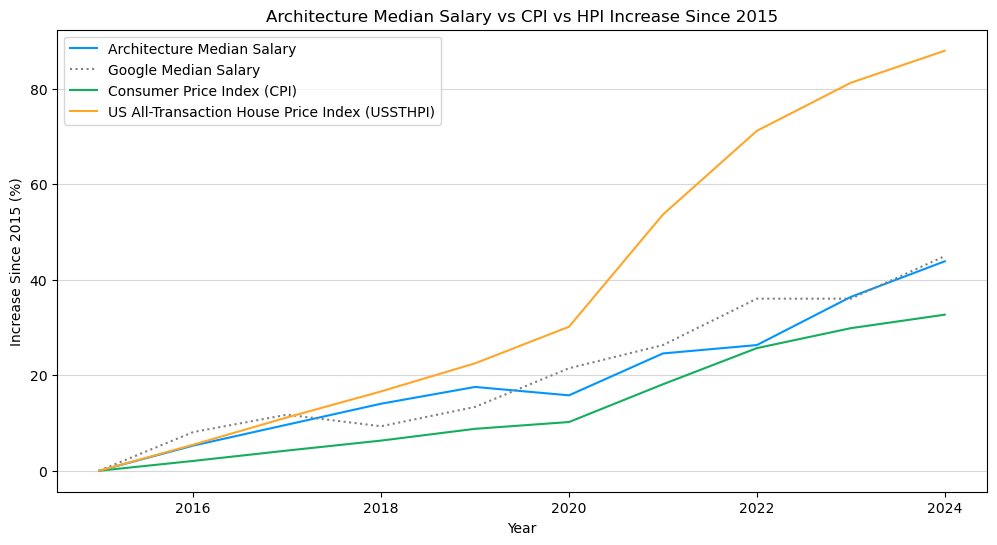

In [15]:
# Plot the median salary by year
plt.figure(figsize=(12, 6))
plt.plot(df_fulltime_median_by_year['Year'], df_fulltime_median_by_year['Salary Growth (%)'], color='#0095FF', label="Architecture Median Salary")
plt.plot(google_salaries_df['Date'], google_salaries_df['Median Salary Growth (%)'], color='grey', linestyle='dotted', label='Google Median Salary')
plt.plot(df_cpi_by_year['DATE'], df_cpi_by_year['CPI Growth (%)'], color='#14AE5C', label='Consumer Price Index (CPI)')
plt.plot(df_ussthpi_by_year['DATE'], df_ussthpi_by_year['USSTHPI Growth (%)'], color='#FFA629', label='US All-Transaction House Price Index (USSTHPI)')
plt.title("Architecture Median Salary vs CPI vs HPI Increase Since 2015")
plt.xlabel("Year")
plt.ylabel("Increase Since 2015 (%)")
plt.legend()

plt.grid(axis='y', alpha=0.5)
plt.gca().set_axisbelow(True)
plt.show()